In [1]:
import PIL
from PIL import Image
import requests
import json
import numpy as np
# from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [2]:

img = Image.open('./testSamples/vh.2.tif')

img_arr = np.array(img)
print(img_arr.shape)

# img_arr_norm = 2*((img_arr-np.min(img_arr)) /
#                   (np.max(img_arr)-np.min(img_arr)))-1

img_arr = np.expand_dims(img_arr, 0)
img_arr = np.expand_dims(img_arr, 3)

data = json.dumps({"signature_name": "serving_default",
                  "instances": img_arr.tolist()})


url = "http://localhost:8601/v1/models/resnet_vh/versions/1:predict"
# url = "http://localhost:8601/v1/models/resnet_vv/versions/1:predict"
# url = "http://localhost:8601/v1/models/unet_vh/versions/1:predict"
# url = "http://localhost:8601/v1/models/unet_vv/versions/1:predict"

#https://satellite-imaging.herokuapp.com/
# url = "https://satellite-imaging.herokuapp.com/v1/models/resnet_vh/versions/1:predict"
# url = "https://satellite-imaging.herokuapp.com/v1/models/resnet_vv/versions/1:predict"
# url = "https://satellite-imaging.herokuapp.com/v1/models/unet_vh/versions/1:predict"
# url = "https://satellite-imaging.herokuapp.com/v1/models/unet_vv/versions/1:predict"

#random test
# url = "http://localhost:8601/v1/models/resnet_vh/versions/2:predict"
response = requests.post(url, data=data, headers={
                        "content_type": "application/json"})

predictions = json.loads(response.text)
# print(decode_predictions(np.array(predictions["predictions"])))
# im = Image.fromarray(prediction.copy())
# im.save("output.tiff")


(256, 256)


(1, 256, 256, 1)
(256, 256)


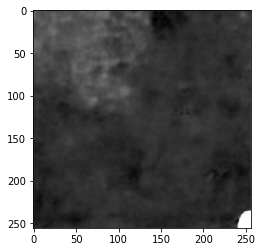

In [3]:
import cv2
import matplotlib.pyplot as plt


prediction = np.array(predictions["predictions"])
print(prediction.shape)

# prediction = 2*((prediction-np.min(img_arr)) /
#                 (np.max(img_arr)-np.min(img_arr)))-1

prediction = prediction.squeeze(0)
prediction = prediction.squeeze(2)
print(prediction.shape)
im = Image.fromarray(prediction)
im.save('./testSamples/output.tif')

prediction = cv2.normalize(prediction, None, alpha=0,
                            beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
cv2.imwrite('./testSamples/output.jpg', prediction)
plt.imshow(prediction, cmap="gray")


In [60]:
prediction[0].shape[0]


256

In [72]:
tempString = ''
for i in range(prediction[0].shape[0]):
    tempString += str(prediction[i].tolist()).replace('[', '').replace(']', '')
    print(tempString)
    if i != (prediction[0].shape[0]-1):
        tempString += '@'
    
print(len(tempString.split('@')))


In [57]:
from PIL import Image, ImageOps
import PIL
img = Image.open('./testSamples/vh.2.tif')

# img = ImageOps.grayscale(img)
img_arr = np.array(img)
print(img_arr.shape)



(256, 256)


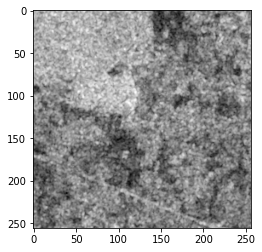

In [40]:
import matplotlib.pyplot as plt
img_arr1 = np.array(img)
plt.imshow(img_arr1,cmap="gray")


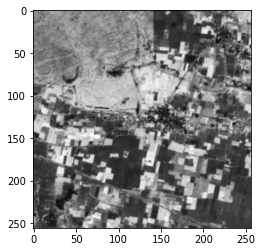

In [81]:
import matplotlib.pyplot as plt
img = Image.open('./testSamples/ndvi.2.tif')
img_arr1 = np.array(img)
plt.imshow(img_arr1, cmap="gray")


# approach 2

In [52]:
import io
import struct
# import tifffile as tiff
# a = tiff.imread('./testSamples/vh.2.tif')
# print(a)
img = Image.open('./testSamples/vh.2.tif')

img_arr = np.array(img)
print(img_arr.shape)


# img_arr = np.expand_dims(img_arr, 0)
# img_arr = np.expand_dims(img_arr, 3)
# img_arr = img_arr.decode("utf-8")

f = None
with open("./testSamples/vh.2.tif", "rb") as image:
  f = image.read(4)
print(img_arr[0][0])
print(struct.unpack('f',f))
image_byte = bytearray(f).decode('utf-8')
data = json.dumps({"signature_name": "serving_default",
                  "instances": image_byte})


#random test
url = "http://localhost:8601/v1/models/resnet_vh/versions/2:predict"
response = requests.post(url, data=data, headers={
                        "content_type": "application/json"})

predictions = json.loads(response.text)
# print(decode_predictions(np.array(predictions["predictions"])))
# im = Image.fromarray(prediction.copy())
# im.save("output.tiff")


[[-13.036284 -12.584245 -13.353821 ... -19.074566 -17.474762 -16.748304]
 [-11.66555  -12.447113 -13.277343 ... -19.295155 -18.374584 -17.297068]
 [-11.664003 -12.928776 -13.210327 ... -17.699001 -18.335148 -17.049278]
 ...
 [-17.79173  -15.733345 -15.966852 ... -15.887494 -14.558676 -14.337106]
 [-15.253547 -14.502349 -14.400682 ... -17.527397 -18.58035  -16.413113]
 [-14.670041 -14.589486 -13.688055 ... -19.750174 -20.316555 -18.013527]]
(256, 256)
-13.036284
(3.883380599124829e-39,)


In [109]:
import base64
import tensorflow_io as tfio
import codecs
from PIL import Image
# import rasterio

# with rasterio.open('example.tif') as dataset:
#     data_array = dataset.read()


# data = open("./testSamples/vh.2.tif", 'rb').read()
from PIL import Image
img = Image.open('./testSamples/vh.2.tif')

img_arr = np.array(img)
print(img_arr)



# print(type(data))
# data = bytes.fromhex(data)

# img = Image.open(data)

# d = codecs.decode(data)

# # print(str(data))
# decoded = tfio.experimental.image.decode_tiff(data)
# img = Image.frombytes("I", (256, 256), data)
# img1 = list(img.getdata())
# print(img1)
# bytes_base64 = base64.b64encode(data)
# text_base64 = bytes_base64.decode()



[[-13.036284 -12.584245 -13.353821 ... -19.074566 -17.474762 -16.748304]
 [-11.66555  -12.447113 -13.277343 ... -19.295155 -18.374584 -17.297068]
 [-11.664003 -12.928776 -13.210327 ... -17.699001 -18.335148 -17.049278]
 ...
 [-17.79173  -15.733345 -15.966852 ... -15.887494 -14.558676 -14.337106]
 [-15.253547 -14.502349 -14.400682 ... -17.527397 -18.58035  -16.413113]
 [-14.670041 -14.589486 -13.688055 ... -19.750174 -20.316555 -18.013527]]


In [42]:
image_byte


bytearray(b'II*\x00\x08\x00\x00\x00\x10\x00\x00\x01\x03\x00\x01\x00\x00\x00\x00\x01\x00\x00\x01\x01\x03\x00\x01\x00\x00\x00\x00\x01\x00\x00\x02\x01\x03\x00\x01\x00\x00\x00 \x00\x00\x00\x03\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x06\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x11\x01\x04\x00 \x00\x00\x00\x0e\x01\x00\x00\x15\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x16\x01\x03\x00\x01\x00\x00\x00\x08\x00\x00\x00\x17\x01\x03\x00 \x00\x00\x00\xce\x00\x00\x00\x1c\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00S\x01\x03\x00\x01\x00\x00\x00\x03\x00\x00\x00\x0e\x83\x0c\x00\x03\x00\x00\x00\x8e\x01\x00\x00\x82\x84\x0c\x00\x06\x00\x00\x00\xa6\x01\x00\x00\xaf\x87\x03\x00 \x00\x00\x00\xd6\x01\x00\x00\xb0\x87\x0c\x00\x02\x00\x00\x00\x16\x02\x00\x00\xb1\x87\x02\x00\x08\x00\x00\x00&\x02\x00\x00\x00\x00\x00\x00\x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 \x00 .\x02\x00\x00."\x00\x00.B\x00\x